In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

In [3]:
#abrir mi fits
slit4 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits'
sp4 = fits.open(slit4)

sp4.info()
sp4[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2245, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4204268105.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

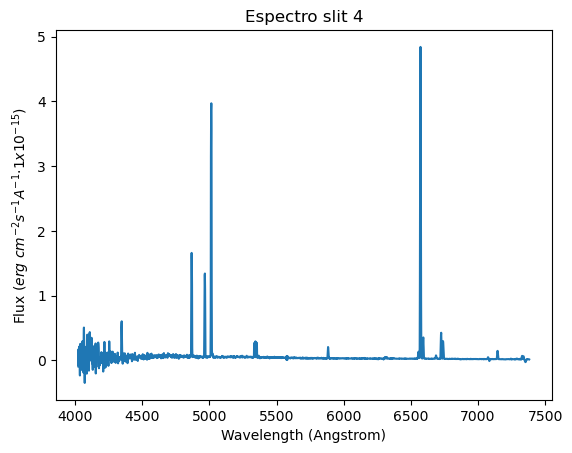

In [4]:
# extraer data (flux)
data4=sp4[0].data
header4=sp4[0].header
obj_name4 = header4.get("OBJECT", "Unknown")

flux4=data4[0]
w4=WCS(header4, naxis=1, relax=False, fix=False)
wave4=w4.wcs_pix2world(np.arange(len(flux4)),0)[0]

plt.plot(wave4, flux4)
plt.title("Espectro slit 4")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [5]:
wave4, flux4

(array([4024.0715332 , 4025.56758475, 4027.0636363 , ..., 7378.2191081 ,
        7379.71515965, 7381.2112112 ]),
 array([-0.09429397,  0.17127489, -0.08293189, ...,  0.01595764,
         0.01675883,  0.01477239], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2236862303.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


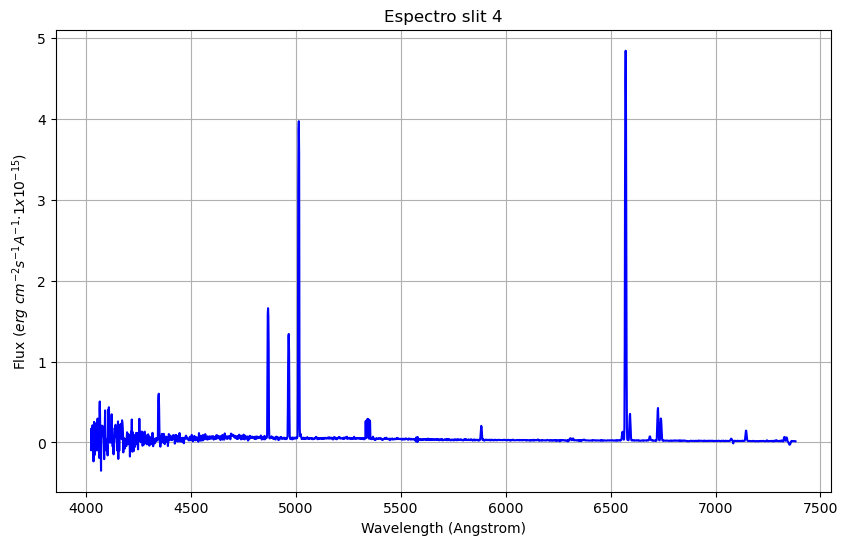

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave4, flux4, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 4')
plt.grid(True)
plt.show()

In [7]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave4_f99 = extinction.fitzpatrick99(wave4, 0.299, 3.1)
print(f' extinción en magnitudes para slit 4 con f99: {wave4_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 4 con f99: [0.42348027 0.42335174 0.42322325 ... 0.18912717 0.18906487 0.1890026 ]


In [8]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux4}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux4_f99 = remove(fitzpatrick99(wave4, 0.299, 3.1), flux4)
print(f'valor de flujo deredden para slit 4 con f99: {flux4_f99}')


valor de flujo original: [-0.09429397  0.17127489 -0.08293189 ...  0.01595764  0.01675883
  0.01477239]
valor de flujo deredden para slit 4 con f99: [-0.13927592  0.25294982 -0.12246468 ...  0.01899413  0.01994663
  0.01758134]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4061225146.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


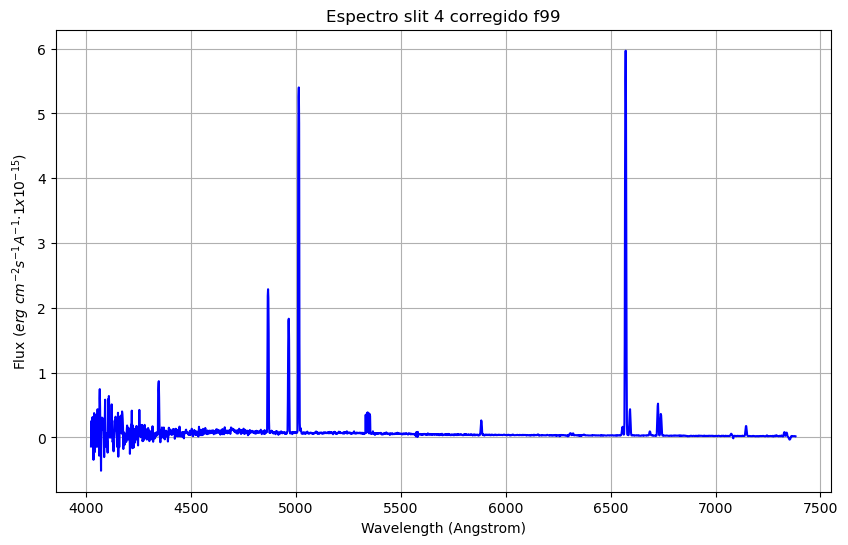

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave4, flux4_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 4 corregido f99')
plt.grid(True)
plt.show()

In [10]:
resta_f99 = flux4_f99 - flux4
resta_f99

array([-0.04498195,  0.08167494, -0.03953279, ...,  0.00303649,
        0.0031878 ,  0.00280894])

In [11]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data4[0] = flux4_f99

# crear nuevo HDU 
slit4corrected = fits.PrimaryHDU(data=data4, header=header4)

# crear nuevo HDUList para guardar en un fits
sp4_corrected = fits.HDUList([slit4corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_2D_f99.fits'
sp4_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_2D_f99.fits


SLIT 8

In [12]:
#abrir mi fits
slit8 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8.fits'
sp8 = fits.open(slit8)

sp8.info()
sp8[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2382, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/328352.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

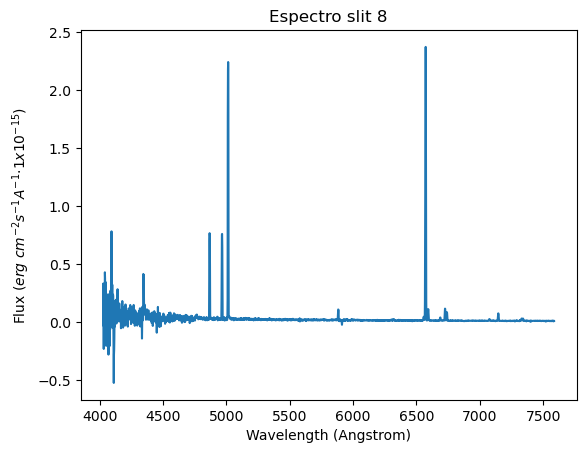

In [13]:
# extraer data (flux)
data8=sp8[0].data
header8=sp8[0].header
obj_name8 = header8.get("OBJECT", "Unknown")

flux8=data8[0]
w8=WCS(header8, naxis=1, relax=False, fix=False)
wave8=w8.wcs_pix2world(np.arange(len(flux8)),0)[0]

plt.plot(wave8, flux8)
plt.title("Espectro slit 8")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [14]:
wave8, flux8

(array([4028.45336914, 4029.94731426, 4031.44125938, ..., 7582.54881382,
        7584.04275894, 7585.53670406]),
 array([-0.02766164,  0.3315872 ,  0.11093271, ...,  0.00995826,
         0.0109825 ,  0.00872552], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4264924729.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


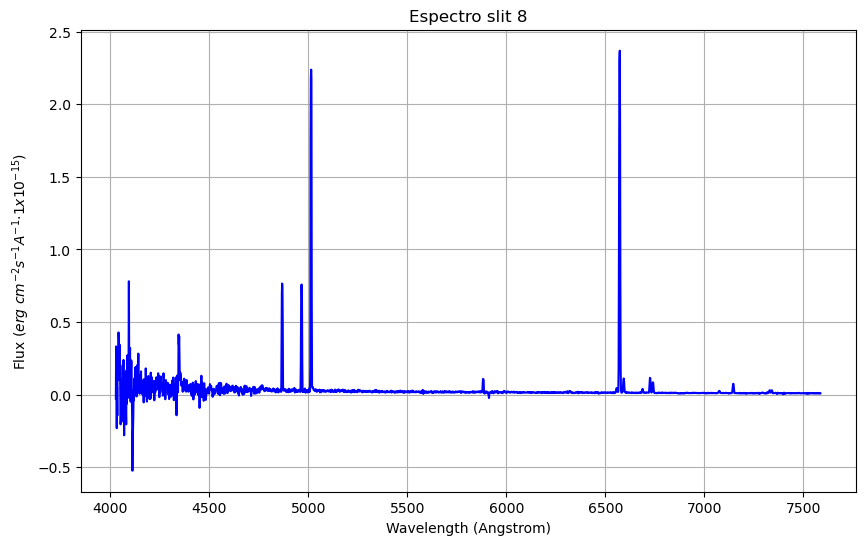

In [15]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave8, flux8, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 8')
plt.grid(True)
plt.show()

In [16]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave8_f99 = extinction.fitzpatrick99(wave8, 0.299, 3.1)
print(f' extinción en magnitudes para slit 8 con f99: {wave8_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 8 con f99: [0.42310391 0.42297566 0.42284744 ... 0.18086544 0.18080683 0.18074825]


In [17]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux8}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux8_f99 = remove(fitzpatrick99(wave8, 0.299, 3.1), flux8)
print(f'valor de flujo deredden para slit 8 con f99: {flux8_f99}')


valor de flujo original: [-0.02766164  0.3315872   0.11093271 ...  0.00995826  0.0109825
  0.00872552]
valor de flujo deredden para slit 8 con f99: [-0.04084318  0.48953981  0.16375652 ...  0.01176331  0.01297251
  0.01030601]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/1350095154.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


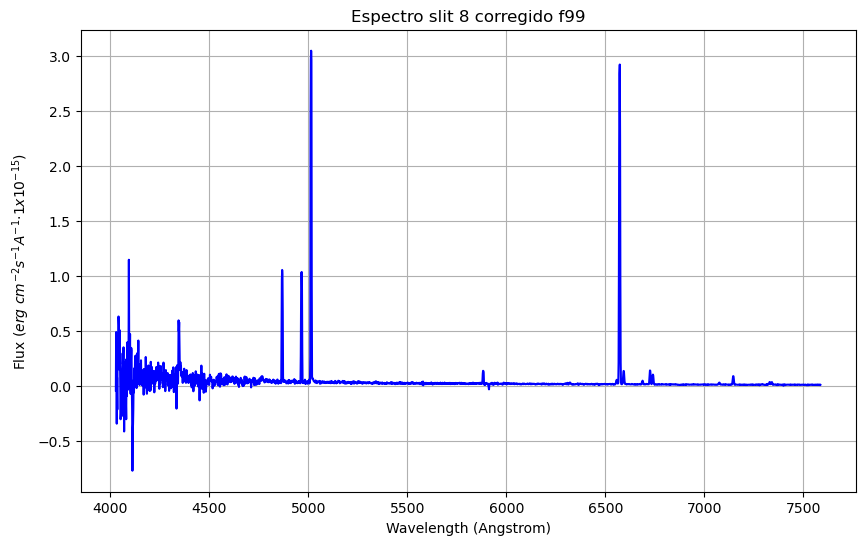

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave8, flux8_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 8 corregido f99')
plt.grid(True)
plt.show()

In [19]:
resta8_f99 = flux8_f99 - flux8
resta8_f99

array([-0.01318154,  0.15795262,  0.05282381, ...,  0.00180505,
        0.00199001,  0.00158049])

In [20]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data8[0] = flux8_f99

# crear nuevo HDU 
slit8corrected = fits.PrimaryHDU(data=data8, header=header8)

# crear nuevo HDUList para guardar en un fits
sp8_corrected = fits.HDUList([slit8corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99.fits'
sp8_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99.fits


SLIT 12

In [21]:
#abrir mi fits
slit12 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12.fits'
sp12 = fits.open(slit12)

sp12.info()
sp12[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2440, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3238986880.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

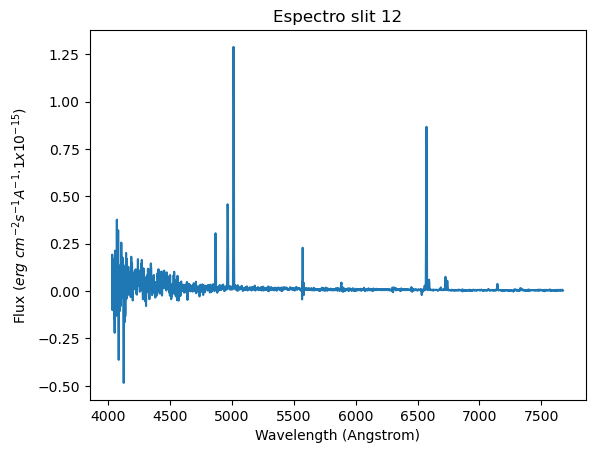

In [22]:
# extraer data (flux)
data12=sp12[0].data
header12=sp12[0].header
obj_name12 = header12.get("OBJECT", "Unknown")

flux12=data12[0]
w12=WCS(header12, naxis=1, relax=False, fix=False)
wave12=w12.wcs_pix2world(np.arange(len(flux12)),0)[0]

plt.plot(wave12, flux12)
plt.title("Espectro slit 12")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [23]:
wave12, flux12

(array([4031.98266602, 4033.47614264, 4034.96961927, ..., 7671.58521152,
        7673.07868814, 7674.57216477]),
 array([ 0.10033564,  0.19232896, -0.10077032, ...,  0.00515911,
         0.00339857,  0.00268561], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3891146827.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


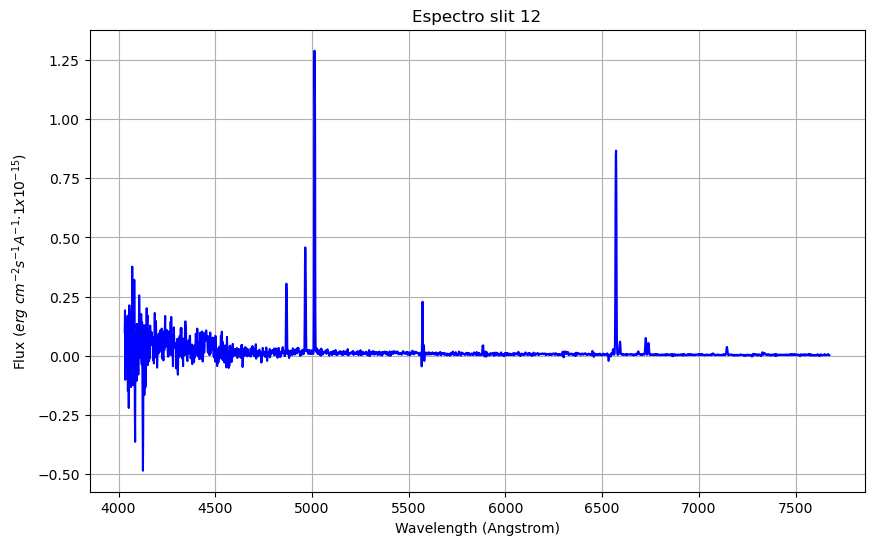

In [24]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave12, flux12, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 12')
plt.grid(True)
plt.show()

In [25]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave12_f99 = extinction.fitzpatrick99(wave12, 0.299, 3.1)
print(f' extinción en magnitudes para slit 12 con f99: {wave12_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 12 con f99: [0.42280098 0.42267285 0.42254474 ... 0.177417   0.17735992 0.17730286]


In [26]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux12}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux12_f99 = remove(fitzpatrick99(wave12, 0.299, 3.1), flux12)
print(f'valor de flujo deredden para slit 12 con f99: {flux12_f99}')


valor de flujo original: [ 0.10033564  0.19232896 -0.10077032 ...  0.00515911  0.00339857
  0.00268561]
valor de flujo deredden para slit 12 con f99: [ 0.14810702  0.28386629 -0.14871355 ...  0.00607493  0.00400166
  0.00316202]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3054045704.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


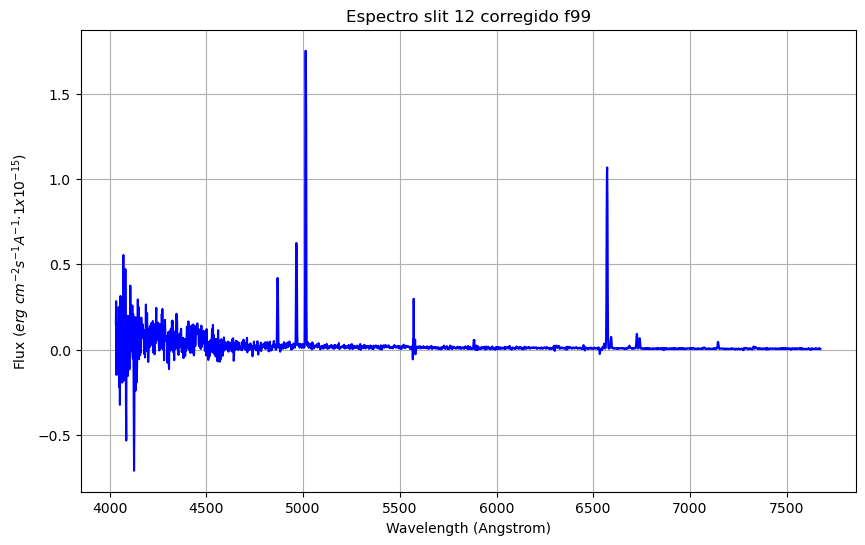

In [27]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave12, flux12_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 12 corregido f99')
plt.grid(True)
plt.show()

In [28]:
resta12_f99 = flux12_f99 - flux12
resta12_f99

array([ 0.04777137,  0.09153733, -0.04794323, ...,  0.00091582,
        0.00060309,  0.00047641])

In [29]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data12[0] = flux12_f99

# crear nuevo HDU 
slit12corrected = fits.PrimaryHDU(data=data12, header=header12)

# crear nuevo HDUList para guardar en un fits
sp12_corrected = fits.HDUList([slit12corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_2D_f99.fits'
sp12_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_2D_f99.fits


SLIT 14

In [30]:
#abrir mi fits
slit14 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14.fits'
sp14 = fits.open(slit14)

sp14.info()
sp14[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2809, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4165784405.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

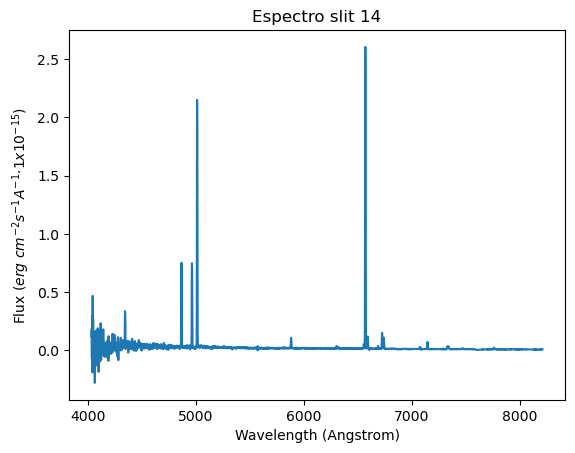

In [31]:
# extraer data (flux)
data14=sp14[0].data
header14=sp14[0].header
obj_name14 = header14.get("OBJECT", "Unknown")

flux14=data14[0]
w14=WCS(header14, naxis=1, relax=False, fix=False)
wave14=w14.wcs_pix2world(np.arange(len(flux14)),0)[0]

plt.plot(wave14, flux14)
plt.title("Espectro slit 14")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [32]:
wave14, flux14

(array([4036.02270508, 4037.50927031, 4038.99583554, ..., 8207.32474685,
        8208.81131208, 8210.29787731]),
 array([ 0.1199077 ,  0.18214515, -0.06493571, ...,  0.00810974,
         0.00759416,  0.00889013], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/1832398228.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


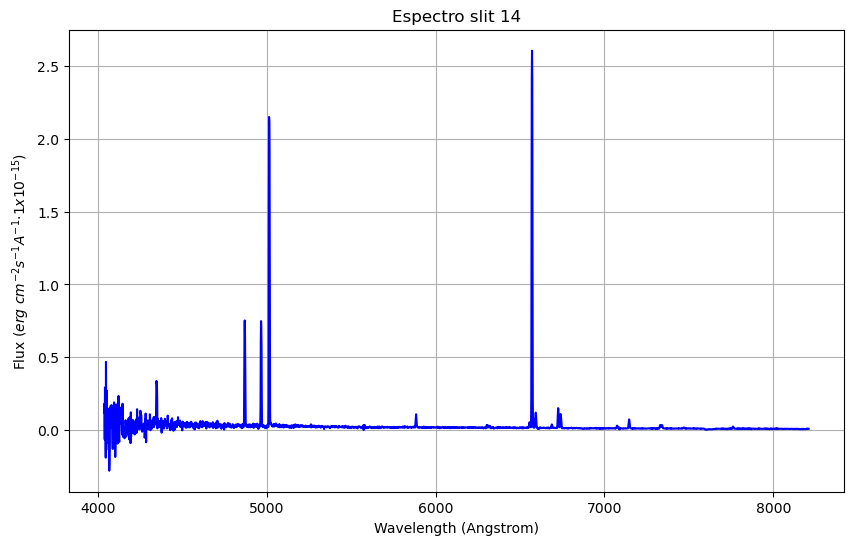

In [33]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave14, flux14, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 14')
plt.grid(True)
plt.show()

In [34]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave14_f99 = extinction.fitzpatrick99(wave14, 0.299, 3.1)
print(f' extinción en magnitudes para slit 14 con f99: {wave14_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 14 con f99: [0.42245443 0.42232697 0.42219955 ... 0.15846331 0.15841475 0.1583662 ]


In [35]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux14}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux14_f99 = remove(fitzpatrick99(wave14, 0.299, 3.1), flux14)
print(f'valor de flujo deredden para slit 14 con f99: {flux14_f99}')


valor de flujo original: [ 0.1199077   0.18214515 -0.06493571 ...  0.00810974  0.00759416
  0.00889013]
valor de flujo deredden para slit 14 con f99: [ 0.17694115  0.26874995 -0.09579954 ...  0.0093841   0.00878711
  0.01028619]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4121170267.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


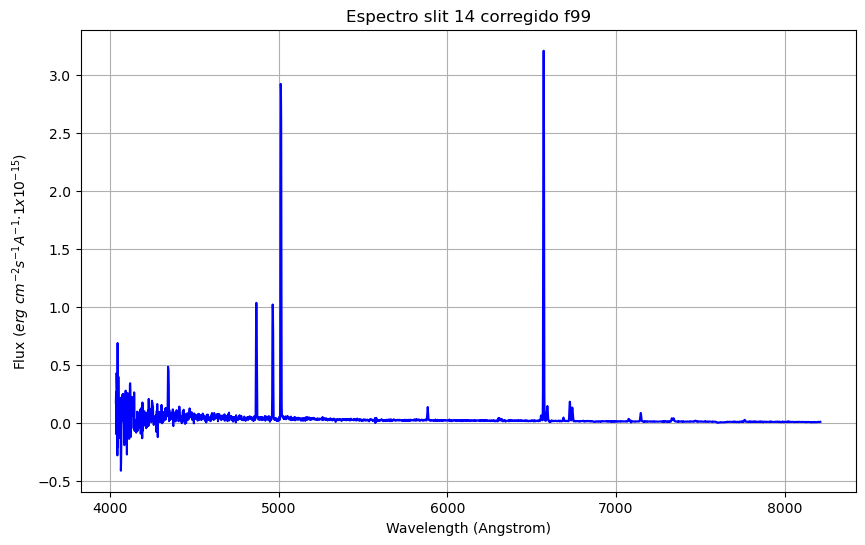

In [36]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave14, flux14_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 14 corregido f99')
plt.grid(True)
plt.show()

In [37]:
resta14_f99 = flux14_f99 - flux14
resta14_f99

array([ 0.05703345,  0.0866048 , -0.03086383, ...,  0.00127435,
        0.00119294,  0.00139606])

In [38]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data14[0] = flux14_f99

# crear nuevo HDU 
slit14corrected = fits.PrimaryHDU(data=data14, header=header14)

# crear nuevo HDUList para guardar en un fits
sp14_corrected = fits.HDUList([slit14corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99.fits'
sp14_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99.fits


SLIT 16

In [39]:
#abrir mi fits
slit16 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16.fits'
sp16 = fits.open(slit16)

sp16.info()
sp16[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2696, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2654255373.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

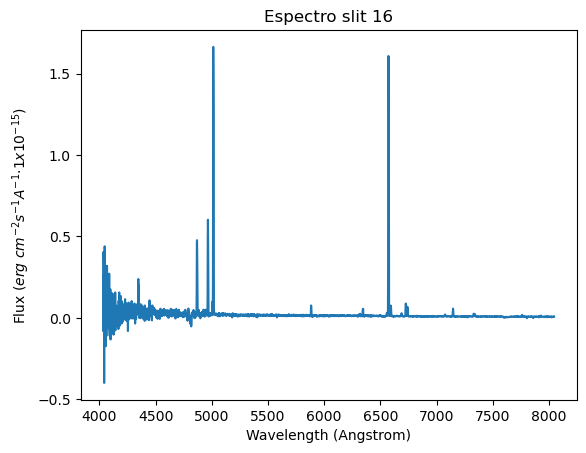

In [40]:
# extraer data (flux)
data16=sp16[0].data
header16=sp16[0].header
obj_name16 = header16.get("OBJECT", "Unknown")

flux16=data16[0]
w16=WCS(header16, naxis=1, relax=False, fix=False)
wave16=w16.wcs_pix2world(np.arange(len(flux16)),0)[0]

plt.plot(wave16, flux16)
plt.title("Espectro slit 16")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [41]:
wave16, flux16

(array([4033.59643555, 4035.08519685, 4036.57395816, ..., 8042.83063209,
        8044.3193934 , 8045.8081547 ]),
 array([ 0.26019663, -0.08204398,  0.405377  , ...,  0.0059161 ,
         0.00668798,  0.00705121], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2731252504.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


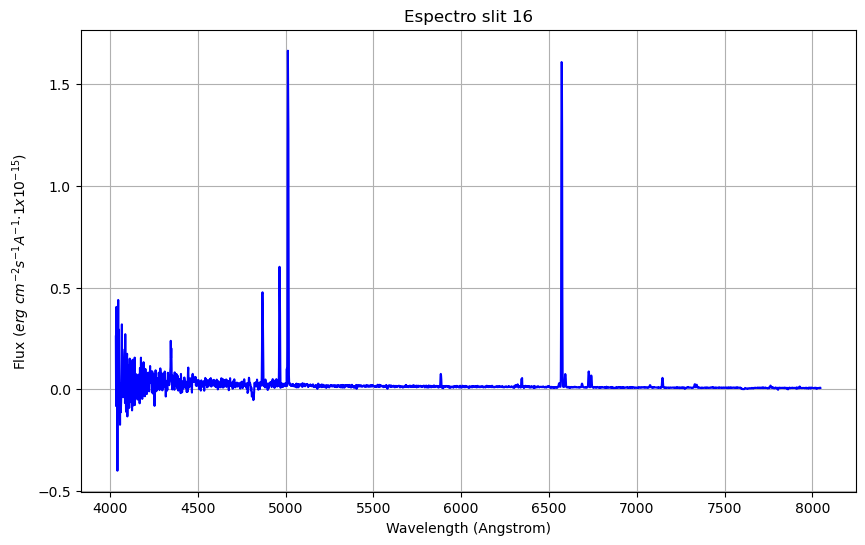

In [42]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave16, flux16, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 16')
plt.grid(True)
plt.show()

In [43]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave16_f99 = extinction.fitzpatrick99(wave16, 0.299, 3.1)
print(f' extinción en magnitudes para slit 16 con f99: {wave16_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 16 con f99: [0.42266253 0.42253483 0.42240716 ... 0.16396987 0.16391884 0.16386783]


In [44]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux16}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux16_f99 = remove(fitzpatrick99(wave16, 0.299, 3.1), flux16)
print(f'valor de flujo deredden para slit 16 con f99: {flux16_f99}')


valor de flujo original: [ 0.26019663 -0.08204398  0.405377   ...  0.0059161   0.00668798
  0.00705121]
valor de flujo deredden para slit 16 con f99: [ 0.38403134 -0.12107671  0.59816634 ...  0.00688056  0.0077779
  0.00819994]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/790787525.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


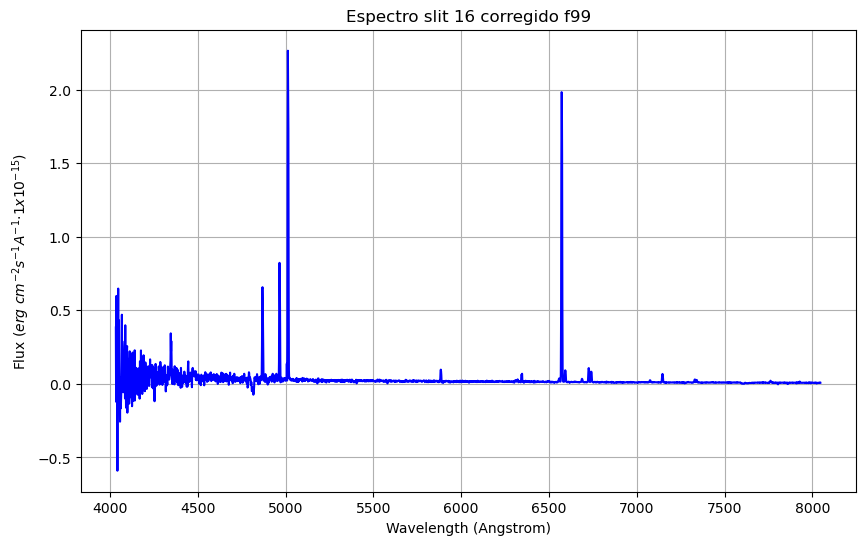

In [45]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave16, flux16_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 16 corregido f99')
plt.grid(True)
plt.show()

In [46]:
resta16_f99 = flux16_f99 - flux16
resta16_f99

array([ 0.12383472, -0.03903274,  0.19278934, ...,  0.00096445,
        0.00108992,  0.00114873])

In [47]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data16[0] = flux16_f99

# crear nuevo HDU 
slit16corrected = fits.PrimaryHDU(data=data16, header=header16)

# crear nuevo HDUList para guardar en un fits
sp16_corrected = fits.HDUList([slit16corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99.fits'
sp16_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99.fits


SLIT 21

In [48]:
#abrir mi fits
slit21 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21.fits'
sp21 = fits.open(slit21)

sp21.info()
sp21[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2829, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/1256533545.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

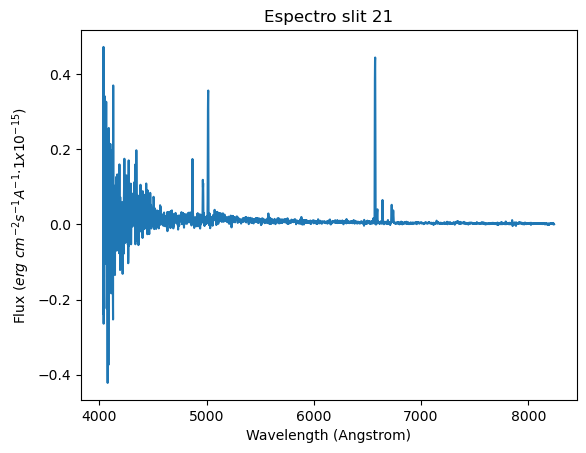

In [49]:
# extraer data (flux)
data21=sp21[0].data
header21=sp21[0].header
obj_name21 = header21.get("OBJECT", "Unknown")

flux21=data21[0]
w21=WCS(header21, naxis=1, relax=False, fix=False)
wave21=w21.wcs_pix2world(np.arange(len(flux21)),0)[0]

plt.plot(wave21, flux21)
plt.title("Espectro slit 21")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [50]:
wave21, flux21

(array([4036.40332031, 4037.88992262, 4039.37652493, ..., 8237.5414381 ,
        8239.02804041, 8240.51464272]),
 array([ 4.4955277e-01, -2.3860142e-01,  4.7204718e-01, ...,
         3.5838195e-04,  1.0038479e-03,  2.7053509e-04], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/1482199018.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


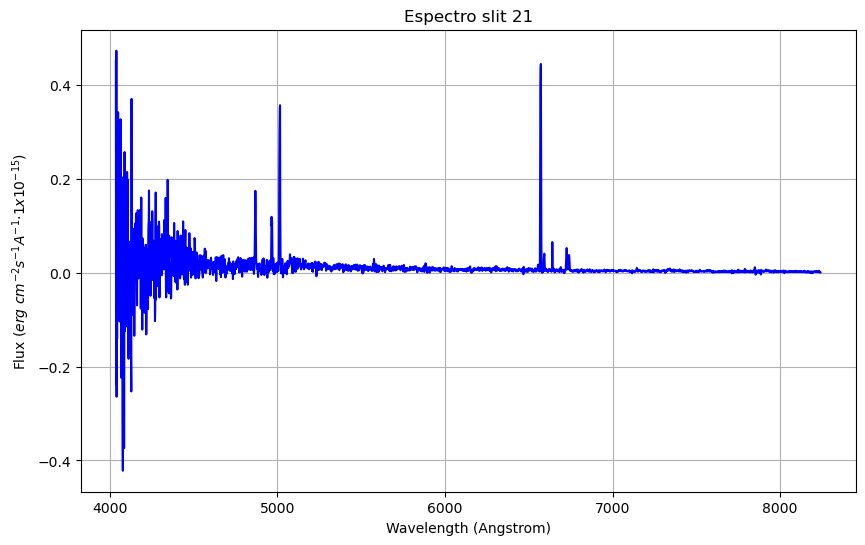

In [51]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21')
plt.grid(True)
plt.show()

In [52]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave21_f99 = extinction.fitzpatrick99(wave21, 0.299, 3.1)
print(f' extinción en magnitudes para slit 21 con f99: {wave21_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 21 con f99: [0.42242179 0.42229434 0.42216692 ... 0.15748025 0.15743211 0.15738399]


In [53]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux21}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux21_f99 = remove(fitzpatrick99(wave21, 0.299, 3.1), flux21)
print(f'valor de flujo deredden para slit 21 con f99: {flux21_f99}')


valor de flujo original: [ 4.4955277e-01 -2.3860142e-01  4.7204718e-01 ...  3.5838195e-04
  1.0038479e-03  2.7053509e-04]
valor de flujo deredden para slit 21 con f99: [ 6.63360183e-01 -3.52038980e-01  6.96389437e-01 ...  4.14322222e-04
  1.16048831e-03  3.12735515e-04]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2717200500.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


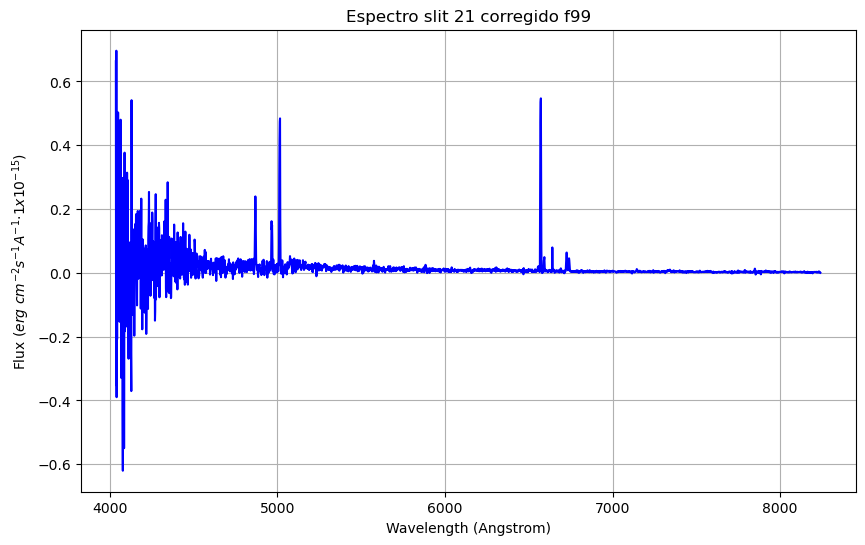

In [54]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido f99')
plt.grid(True)
plt.show()

In [55]:
resta21_f99 = flux21_f99 - flux21
resta21_f99

array([ 2.13807409e-01, -1.13437564e-01,  2.24342257e-01, ...,
        5.59402735e-05,  1.56640384e-04,  4.22004226e-05])

In [56]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data21[0] = flux21_f99

# crear nuevo HDU 
slit21corrected = fits.PrimaryHDU(data=data21, header=header21)

# crear nuevo HDUList para guardar en un fits
sp21_corrected = fits.HDUList([slit21corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21_2D_f99.fits'
sp21_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21_2D_f99.fits


SLIT 23

In [57]:
#abrir mi fits
slit23 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23.fits'
sp23 = fits.open(slit23)

sp23.info()
sp23[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (3184, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/1719912561.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

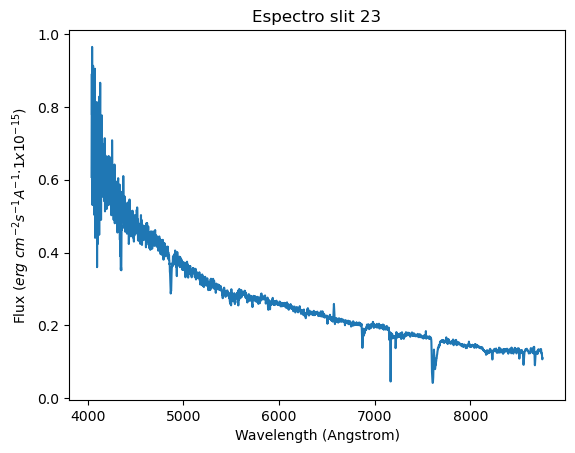

In [58]:
# extraer data (flux)
data23=sp23[0].data
header23=sp23[0].header
obj_name23 = header23.get("OBJECT", "Unknown")

flux23=data23[0]
w23=WCS(header23, naxis=1, relax=False, fix=False)
wave23=w23.wcs_pix2world(np.arange(len(flux23)),0)[0]

plt.plot(wave23, flux23)
plt.title("Espectro slit 23")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [59]:
wave23, flux23

(array([4040.19873047, 4041.67900491, 4043.15927935, ..., 8748.95172048,
        8750.43199492, 8751.91226935]),
 array([0.6077397 , 0.7296134 , 0.8903512 , ..., 0.10964818, 0.1071189 ,
        0.11014793], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3646370729.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


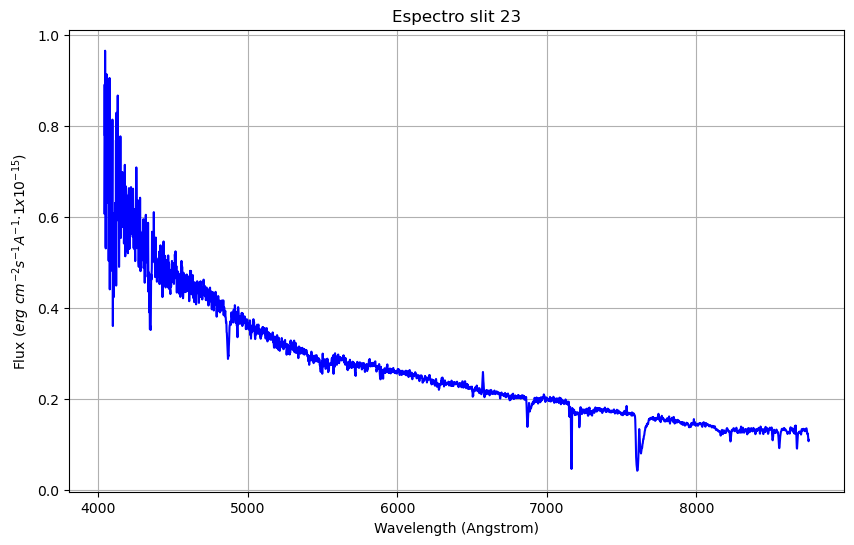

In [60]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23')
plt.grid(True)
plt.show()

In [61]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave23_f99 = extinction.fitzpatrick99(wave23, 0.299, 3.1)
print(f' extinción en magnitudes para slit 23 con f99: {wave23_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 23 con f99: [0.42209646 0.42196963 0.42184282 ... 0.14208823 0.14204691 0.1420056 ]


In [62]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux23}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux23_f99 = remove(fitzpatrick99(wave23, 0.299, 3.1), flux23)
print(f'valor de flujo deredden para slit 23 con f99: {flux23_f99}')


valor de flujo original: [0.6077397  0.7296134  0.8903512  ... 0.10964818 0.1071189  0.11014793]
valor de flujo deredden para slit 23 con f99: [0.89651215 1.07616947 1.31310201 ... 0.1249789  0.12209134 0.12553898]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3226434261.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


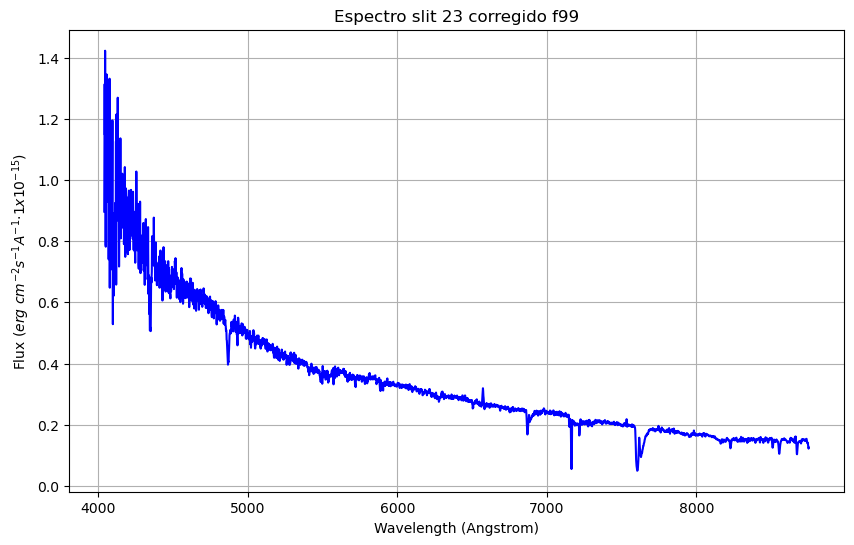

In [63]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23 corregido f99')
plt.grid(True)
plt.show()

In [64]:
resta23_f99 = flux23_f99 - flux23
resta23_f99

array([0.28877247, 0.34655604, 0.42275083, ..., 0.01533073, 0.01497244,
       0.01539105])

In [65]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data23[0] = flux23_f99

# crear nuevo HDU 
slit23corrected = fits.PrimaryHDU(data=data23, header=header23)

# crear nuevo HDUList para guardar en un fits
sp23_corrected = fits.HDUList([slit23corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23_2D_f99.fits'
sp23_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23_2D_f99.fits


SLIT 25

In [66]:
#abrir mi fits
slit25 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25.fits'
sp25 = fits.open(slit25)

sp25.info()
sp25[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2590, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2578588392.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

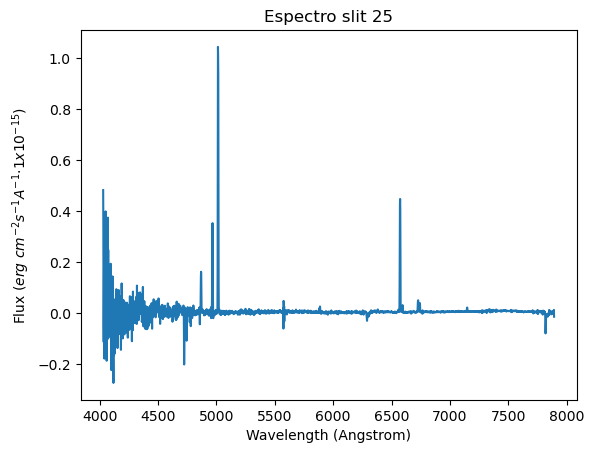

In [67]:
# extraer data (flux)
data25=sp25[0].data
header25=sp25[0].header
obj_name25 = header25.get("OBJECT", "Unknown")

flux25=data25[0]
w25=WCS(header25, naxis=1, relax=False, fix=False)
wave25=w25.wcs_pix2world(np.arange(len(flux25)),0)[0]

plt.plot(wave25, flux25)
plt.title("Espectro slit 25")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [68]:
wave25, flux25

(array([4030.51049805, 4032.001701  , 4033.49290395, ..., 7888.25253093,
        7889.74373388, 7891.23493683]),
 array([ 0.48198706,  0.3328369 , -0.04018619, ...,  0.00344976,
         0.0122887 , -0.01453716], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/2484966255.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


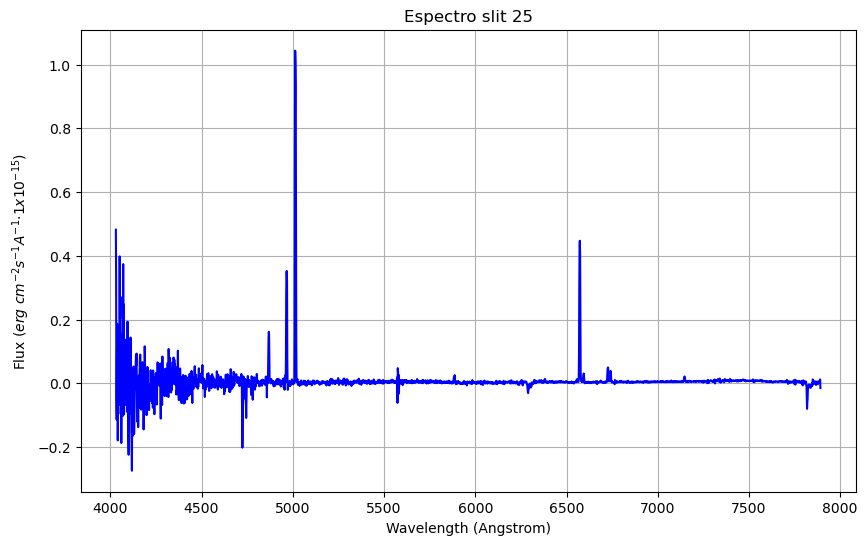

In [69]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave25, flux25, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 25')
plt.grid(True)
plt.show()

In [70]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave25_f99 = extinction.fitzpatrick99(wave25, 0.299, 3.1)
print(f' extinción en magnitudes para slit 25 con f99: {wave25_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 25 con f99: [0.42292732 0.42279935 0.42267141 ... 0.16939177 0.16933829 0.16928482]


In [71]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux25}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux25_f99 = remove(fitzpatrick99(wave25, 0.299, 3.1), flux25)
print(f'valor de flujo deredden para slit 25 con f99: {flux25_f99}')


valor de flujo original: [ 0.48198706  0.3328369  -0.04018619 ...  0.00344976  0.0122887
 -0.01453716]
valor de flujo deredden para slit 25 con f99: [ 0.71155145  0.49130502 -0.05931238 ...  0.00403223  0.01436287
 -0.01699001]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/544286823.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


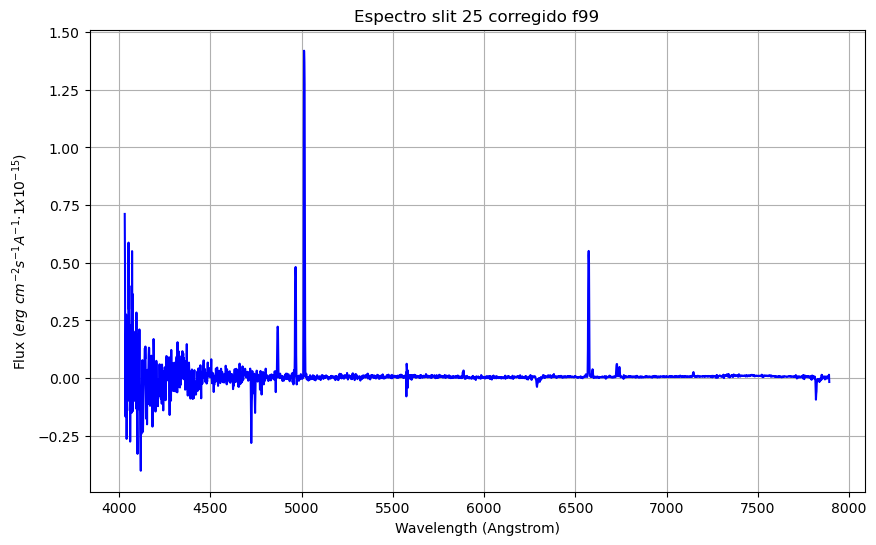

In [74]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave25, flux25_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 25 corregido f99')
plt.grid(True)
plt.show()

In [75]:
resta25_f99 = flux25_f99 - flux25
resta25_f99

array([ 0.22956439,  0.15846813, -0.0191262 , ...,  0.00058247,
        0.00207417, -0.00245284])

In [76]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data25[0] = flux25_f99

# crear nuevo HDU 
slit25corrected = fits.PrimaryHDU(data=data25, header=header25)

# crear nuevo HDUList para guardar en un fits
sp25_corrected = fits.HDUList([slit25corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25_2D_f99.fits'
sp25_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25_2D_f99.fits


SLIT 27

In [77]:
#abrir mi fits
slit27 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27.fits'
sp27 = fits.open(slit27)

sp27.info()
sp27[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2699, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/3553437002.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

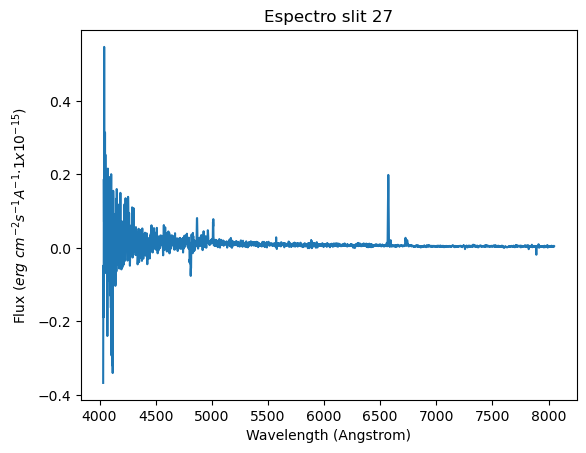

In [78]:
# extraer data (flux)
data27=sp27[0].data
header27=sp27[0].header
obj_name27 = header27.get("OBJECT", "Unknown")

flux27=data27[0]
w27=WCS(header27, naxis=1, relax=False, fix=False)
wave27=w27.wcs_pix2world(np.arange(len(flux27)),0)[0]

plt.plot(wave27, flux27)
plt.title("Espectro slit 27")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [79]:
wave27, flux27

(array([4032.66870117, 4034.15737641, 4035.64605165, ..., 8046.13713932,
        8047.62581456, 8049.11448979]),
 array([-0.36766458, -0.04863661, -0.12006944, ...,  0.00386404,
         0.00539101,  0.00488776], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/4086451150.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


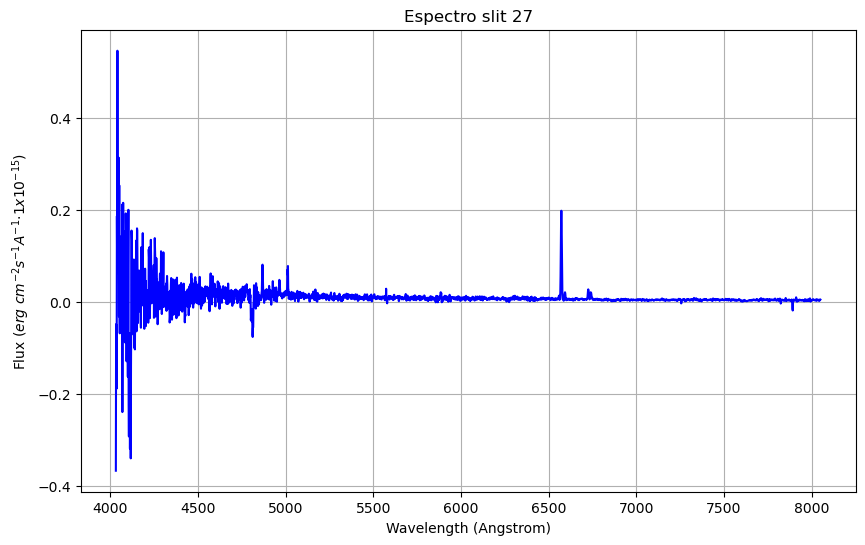

In [84]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave27, flux27, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 27')
#plt.xlim(4800,5200)
plt.grid(True)
plt.show()

In [85]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave27_f99 = extinction.fitzpatrick99(wave27, 0.299, 3.1)
print(f' extinción en magnitudes para slit 27 con f99: {wave27_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 27 con f99: [0.42274212 0.42261441 0.42248673 ... 0.16385656 0.16380557 0.16375461]


In [86]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux27}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux27_f99 = remove(fitzpatrick99(wave27, 0.299, 3.1), flux27)
print(f'valor de flujo deredden para slit 27 con f99: {flux27_f99}')


valor de flujo original: [-0.36766458 -0.04863661 -0.12006944 ...  0.00386404  0.00539101
  0.00488776]
valor de flujo deredden para slit 27 con f99: [-0.54268602 -0.07178093 -0.1771851  ...  0.00449349  0.00626892
  0.00568345]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_774/325316206.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


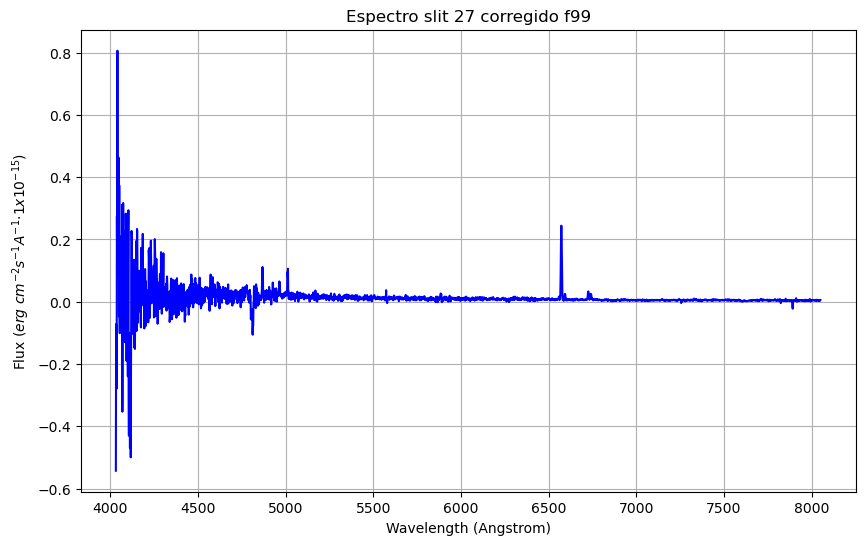

In [87]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave27, flux27_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 27 corregido f99')
plt.grid(True)
plt.show()

In [88]:
resta27_f99 = flux27_f99 - flux27
resta27_f99

array([-0.17502145, -0.02314432, -0.05711565, ...,  0.00062945,
        0.00087791,  0.00079569])

In [89]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data27[0] = flux27_f99

# crear nuevo HDU 
slit27corrected = fits.PrimaryHDU(data=data27, header=header27)

# crear nuevo HDUList para guardar en un fits
sp27_corrected = fits.HDUList([slit27corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99.fits'
sp27_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99.fits


In [2]:
#abrir mi fits
slit10 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit10.fits'
sp10 = fits.open(slit10)

sp10.info()
sp10[0].header["OBJECT"]

Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2386, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_6630/2027991002.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

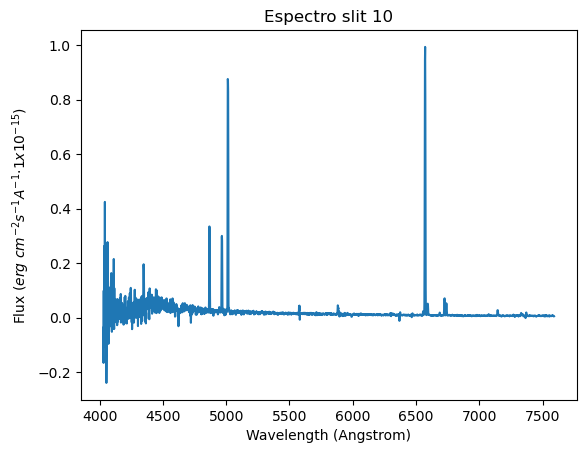

In [3]:
# extraer data (flux)
data10=sp10[0].data
header10=sp10[0].header
obj_name10 = header10.get("OBJECT", "Unknown")

flux10=data10[0]
w10=WCS(header10, naxis=1, relax=False, fix=False)
wave10=w10.wcs_pix2world(np.arange(len(flux10)),0)[0]

plt.plot(wave10, flux10)
plt.title("Espectro slit 10")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [4]:
wave10, flux10

(array([4027.77709961, 4029.27111685, 4030.7651341 , ..., 7588.0201906 ,
        7589.51420784, 7591.00822508]),
 array([-0.03729629, -0.15906045, -0.166033  , ...,  0.00656487,
         0.0063766 ,  0.00529186], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_6630/1740848876.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


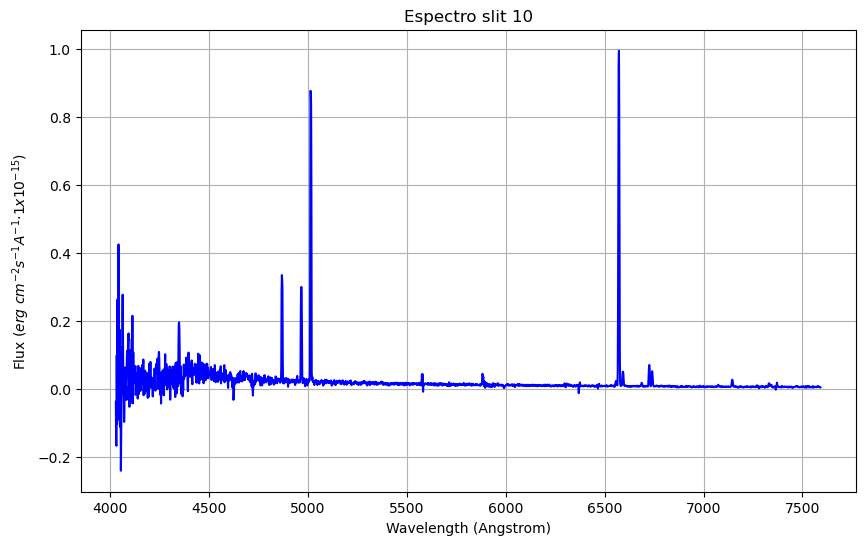

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave10, flux10, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 10')
plt.grid(True)
plt.show()

In [6]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave4
# mi A_v (de NED) es 0.299 (Landolt+2011)
# Fitzpatrick (1999)
wave10_f99 = extinction.fitzpatrick99(wave10, 0.299, 3.1)
print(f' extinción en magnitudes para slit 10 con f99: {wave10_f99}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 10 con f99: [0.42316198 0.42303371 0.42290547 ... 0.18065092 0.18059241 0.18053392]


In [7]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux10}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux10_f99 = remove(fitzpatrick99(wave10, 0.299, 3.1), flux10)
print(f'valor de flujo deredden para slit 10 con f99: {flux10_f99}')


valor de flujo original: [-0.03729629 -0.15906045 -0.166033   ...  0.00656487  0.0063766
  0.00529186]
valor de flujo deredden para slit 10 con f99: [-0.05507194 -0.23484195 -0.2451075  ...  0.0077533   0.00753054
  0.00624917]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_6630/1171051785.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


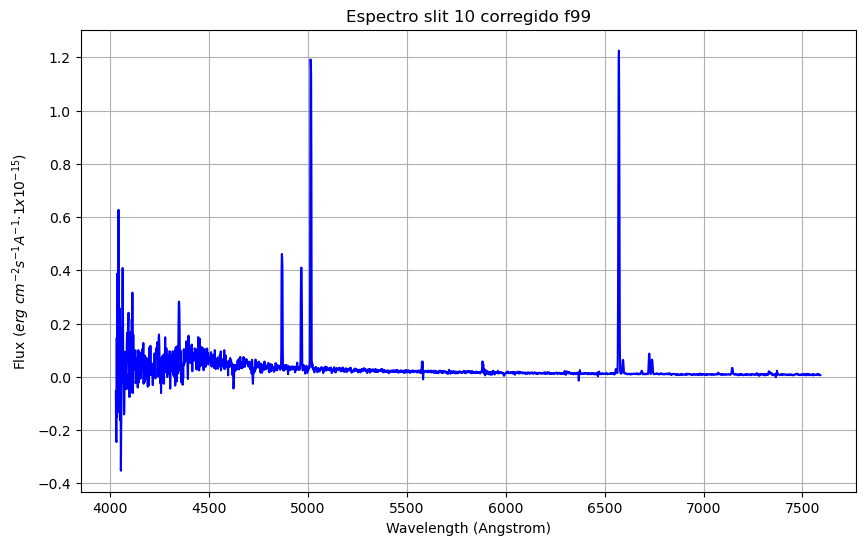

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave10, flux10_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 10 corregido f99')
plt.grid(True)
plt.show()

In [9]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data10[0] = flux10_f99

# crear nuevo HDU 
slit10corrected = fits.PrimaryHDU(data=data10, header=header10)

# crear nuevo HDUList para guardar en un fits
sp10_corrected = fits.HDUList([slit10corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit10_2D_f99.fits'
sp10_corrected.writeto(new_fits_file, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit10_2D_f99.fits
